# Hypothesis Testing

Hypothesis testing is a vital process in inferential statistics where the goal is to use sample data to draw conclusions about an entire population.

Let's demonstrate using an example

**Example *(one sample t test)***<br>
The One Sample t Test determines whether the sample mean is statistically different from a known or hypothesised population mean. 
<br>The term “t-test” refers to the fact that these hypothesis tests use t-values to evaluate your sample data.

A researcher is studying fuel expenditures for families and wants to determine if the monthly cost has changed since last year when the average was $260 per month. The researcher draws a random sample of 25 families and enters their monthly costs for this year.

The dependent variable should be approximately normally distributed in a one sample t test.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns

In [63]:
# the sample data collected and entered by the researcher
fuelcosts = pd.read_csv("FuelsCosts.csv")
fuelcosts.head()

,Family ID,Fuel Cost
0,1,211
1,2,572
2,3,558
3,4,250
4,5,478


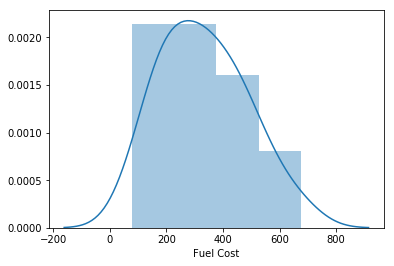

In [64]:
# let's see if the data is normally distributed
sns.distplot(fuelcosts["Fuel Cost"])

In [65]:
# descriptive statistics of the sample
fuelcosts["Fuel Cost"].describe()

count     25.000000
mean     330.560000
std      154.177679
min       77.000000
25%      205.000000
50%      320.000000
75%      435.000000
max      676.000000
Name: Fuel Cost, dtype: float64

We obtained a sample mean of 330.6. However, it’s conceivable that, due to sampling error(The sampling error is the gap between the sample statistic and the population parameter.), the mean of the population might be only 260.  It’s impossible to assess this possibility by looking at only the sample mean.

Hypothesis testing is a form of inferential statistics that allows us to draw conclusions about an entire population based on a representative sample. 

*Let's formualte the null and alternate hypothesis*

**Null Hypothesis:** The population mean is equal to 260
<br>**Alternate Hypothesis:** The population mean is not equal to 260

**The t Distribution**

T-values are a type of test statistic.
<br>Hypothesis tests use the test statistic that is calculated from your sample to compare your sample to the null hypothesis. If the test statistic is extreme enough, this indicates that your data are so incompatible with the null hypothesis that you can reject the null.<br>
For example,
<br>If the sample data equals the null hypothesis precisely, the t-test produces a t-value of 0.
<br>As the sample data become progressively dissimilar from the null hypothesis, the absolute value of the t-value increases.


the t-value is given by the formula:
![ttest](ttest.png)

A single t-test (a single sample) produces a single t-value. Now, imagine the following process. First, let’s assume that the null hypothesis is true for the population. Now, suppose we repeat our study many times by drawing many random samples of the same size from this population. Next, we perform t-tests on all of the samples and plot the distribution of the t-values. This distribution is known as a sampling distribution, which is a type of probability distribution.

If we follow this procedure, we produce a graph that displays the distribution of t-values that we obtain from a population where the null hypothesis is true. We use sampling distributions to calculate probabilities for how unusual our sample statistic is if the null hypothesis is true.

Luckily, we don’t need to go to the trouble of collecting numerous random samples to create this graph! Statisticians understand the properties of t-distributions so we can estimate the sampling distribution using the t-distribution and our sample size.
<br>The degrees of freedom (DF) for the statistical design define the t-distribution for a particular study. The DF are closely related to the sample size. 

This is the equation of the curve of t distribution. All you need to know is the shape of the t distribution depends only on the degrees of freedom v.
![tdistribution](tdd.png)

Text(0.5, 0, 't value')

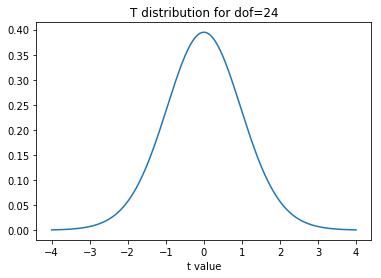

In [66]:
# let's plot t distribution in python

import matplotlib.pyplot as plt
from scipy import stats

dof = 24        # Degrees of freedom
x = np.linspace(-4, 4, 1000) # the range should be -4 to 4
y = stats.t.pdf(x, dof)
plt.plot(x, y)
plt.title("T distribution for dof=24")
plt.xlabel("t value")

T-distributions assume that the null hypothesis is correct for the population from which you draw your random samples. To evaluate how compatible your sample data are with the null hypothesis, place your study’s t-value in the t-distribution and determine how unusual it is.

the t-distribution centers on zero because it assumes that the null hypothesis is true. When the null is true, your study is most likely to obtain a t-value near zero and less liable to produce t-values further from zero in either direction.

The sample size for a t-test determines the degrees of freedom (DF) for that test, which specifies the t-distribution. The overall effect is that as the sample size decreases, the tails of the t-distribution become thicker. Thicker tails indicate that t-values are more likely to be far from zero even when the null hypothesis is correct. The changing shapes are how t-distributions factor in the greater uncertainty that is present when you have a smaller sample.

Sample means from smaller samples tend to be less precise. In other words, with a smaller sample, it’s less surprising to have an extreme t-value, which affects the probabilities and p-values

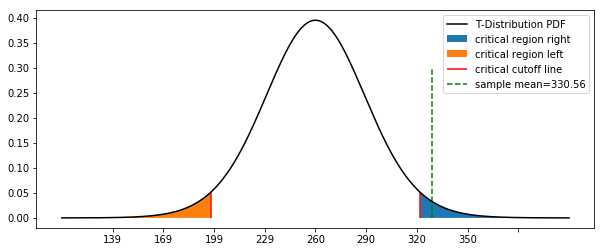

In [67]:
# Now let's get back to our problem

## Setup      

# For a 1-sample t-test, the degrees of freedom equals the sample size minus 1. 
# So, that’s 24 degrees of freedom for our sample of 25.
dof = 24        # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t-score
tcrit = abs(stats.t.ppf(alpha/ntails, dof)) # obtain the t score for a p value of 0.025
# +=2.068

plt.figure(figsize=(10, 4))
xs = np.linspace(-5, 5, 1000)
plt.xticks(list(range(-4, 5)), xvalues)
fill_right = np.linspace(tcrit, 5, 100)
plt.fill_between(fill_right, stats.t.pdf(fill_right,dof), label='critical region right')
fill_left = np.linspace(-tcrit, -5, 100)
plt.fill_between(fill_left, stats.t.pdf(fill_right,dof), label='critical region left')
plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
plt.vlines([-tcrit, tcrit], 0.0, stats.t.pdf(tcrit, dof), colors='r', label="critical cutoff line")

# plotting a vertical line through our sample mean
# first let's calculate the t statistic
tstatistic = abs(np.mean(fuelcosts["Fuel Cost"])-260)*np.sqrt(24)/np.std(fuelcosts["Fuel Cost"])
plt.vlines(tstatistic, 0.0, 0.30, 'g', '--', label="sample mean=330.56")

plt.legend()

**NOTE:** the t distribution is centered around 0 and ranges from -4 to 4 in this example, but for demonstration purposes, we've translated the t values into X values. This can be done by rearranging the formula shown as below.

X = $\mu$+tvalue*S/$\sqrt{N}$

where $\mu$ is the null hypothesis mean, S is the standard deviation of the sample, N is degree of freedom

In [68]:
# let's get the X values corresponding to the t values
xvalues = [260+x*np.std(fuelcosts["Fuel Cost"])/np.sqrt(len(fuelcosts["Fuel Cost"]))
          for x in range(-4, 4, 1)] 

In [69]:
xvalues = list(map(lambda x: int(x), xvalues))
xvalues

[139, 169, 199, 229, 260, 290, 320, 350]

Hypothesis tests work by taking the observed test statistic from a sample and using the sampling distribution to calculate the probability of obtaining that test statistic if the null hypothesis is correct. If a t-value is sufficiently improbable when the null hypothesis is true, you can reject the null hypothesis.

**Interpretation from the graph**

![hypothesistesting](hp.png)

The graph shows which sample means are more likely and less likely if the population mean is 260 i.e assuming the null hypothesis is true. We can place our sample mean in this distribution. This larger context helps us see how unlikely our sample mean is if the null hypothesis is true (μ = 260).

The most likely values are near 260 because the plot assumes that this is the true population mean.
<br>The sampling distribution shows us that we are relatively unlikely to obtain a sample of 330.6 if the population mean is 260.

Is our sample mean so unlikely that we can reject the notion that the population mean is 260?

In statistics, we call this rejecting the null hypothesis. If we reject the null hypothesis for our example, the difference between the sample mean (330.6) and 260 is statistically significant. In other words, there is a low probability that the difference has occured merely by random chance

**Significance level**

A significance level, also known as alpha or α, is an evidentiary standard that a researcher sets before the study. It defines how strongly the sample evidence must contradict the null hypothesis before you can reject the null hypothesis for the entire population. The strength of the evidence is defined by the probability of rejecting a null hypothesis that is true. In other words, it is the probability that you say there is an effect when there is no effect.  (in this case, the effect is change in monthly cost)

For instance, a significance level of 0.05 signifies a 5% risk of deciding that an effect exists when it does not exist.

Lower significance levels require stronger sample evidence to be able to reject the null hypothesis. For example, to be statistically significant at the 0.01 significance level requires more substantial evidence than the 0.05 significance level. However, there is a tradeoff in hypothesis tests. Lower significance levels also reduce the power of a hypothesis test to detect a difference that does exist.

**Graphing the significance level**

On the probability distribution plot, the significance level defines how far the sample value must be from the null value so we can reject the null hypothesis. 
<br>The percentage of the area under the curve that is shaded equals the probability that the sample value will fall in those regions if the null hypothesis is correct.

The two shaded regions in the graph are equidistant from the central value of the null hypothesis (since it's a two tailed test). Each region has a probability of 0.025, which sums to our desired total of 0.05. These shaded areas are called the critical region for a two-tailed hypothesis test

If the null hypothesis is correct and the population mean is 260, random samples (n=25) from this population have means that fall in the critical region 5% of the time.

You must set the significance level before conducting a study. You don’t want the temptation of choosing a level after the study that yields significant results.

**P Value**

The graphical version of the one-sample t-test we created allows us to determine statistical significance without assessing the P value. Typically, you need to compare the P value to the significance level to make this determination.

P values are the probability that a sample will have an effect at least as extreme as the effect observed in your sample if the null hypothesis is correct.

First, we need to calculate the effect that is present in our sample. The effect is the distance between the sample value and null value: 330.6 – 260 = 70.6. Next, we'll shade the regions on both sides of the distribution that are at least as far away as 70.6 from the null (260 +/- 70.6). This process graphs the probability of observing a sample mean at least as extreme as our sample mean.

If your P value is less than or equal to your alpha level, reject the null hypothesis.

In [70]:
# calculating the p value for a given t statistic
stats.t.sf(tstatistic, 24)*2

0.03122655947427309

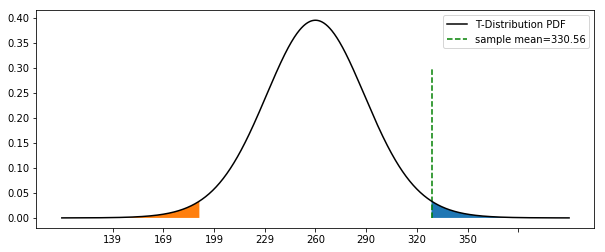

In [71]:
# Let's plot a graph showing the p values

plt.figure(figsize=(10, 4))
xs = np.linspace(-5, 5, 1000)
plt.xticks(list(range(-4, 5)), xvalues)

fill_right = np.linspace(tstatistic, 5, 100)
plt.fill_between(fill_right, stats.t.pdf(fill_right,dof))
fill_left = np.linspace(-tstatistic, -5, 100)
plt.fill_between(fill_left, stats.t.pdf(fill_right,dof))
plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

# plotting a vertical line through our sample mean
# first let's calculate the t statistic
tstatistic = abs(np.mean(fuelcosts["Fuel Cost"])-260)*np.sqrt(24)/np.std(fuelcosts["Fuel Cost"])
plt.vlines(tstatistic, 0.0, 0.30, 'g', '--', label="sample mean=330.56")

plt.legend()


The total probability of the two shaded regions is 0.03122. If the null hypothesis value (260) is true and you drew many random samples, you’d expect sample means to fall in the shaded regions about 3.1% of the time. In other words, you will observe sample effects at least as large as 70.6 about 3.1% of the time if the null is true. That’s the P value!

Using the significance level of 0.05, the sample effect is statistically significant. Our data support the alternative hypothesis, which states that the population mean doesn’t equal 260. We can conclude that mean fuel expenditures have increased since last year.

The significance level is the rate at which you incorrectly reject null hypotheses that are actually true (type I error). For example, for all studies that use a significance level of 0.05 and the null hypothesis is correct, you can expect 5% of them to have sample statistics that fall in the critical region. When this error occurs, you aren’t aware that the null hypothesis is correct, but you’ll reject it because the p-value is less than 0.05.

This error does not indicate that the researcher made a mistake. As the graphs show, you can observe extreme sample statistics due to sample error alone. It’s the luck of the draw!

In [72]:
# we have built in methods in python to perform the hyothesis tests
# we can get the t value and p value from the data
# the method takes in the sample data and null hypothesis mean as an argument
tstat, pvalue = stats.ttest_1samp(fuelcosts["Fuel Cost"], 260)

In [73]:
tstat

2.288268979979398

In [74]:
pvalue

0.03122655947427306

In [75]:
tstatistic

2.2882689799793976

References:
<br>https://statisticsbyjim.com/hypothesis-testing/t-tests-t-values-t-distributions-probabilities/
<br>https://www.cse.iitk.ac.in/users/nsrivast/HCC/lec07-09.pdf
<br>https://statisticsbyjim.com/hypothesis-testing/hypothesis-tests-significance-levels-alpha-p-values/